## The OOI RCA Shallow Profiler


This notebook is an introduction to the physical and bio-optical data from the Ocean Observatories 
Initiative (***OOI***) Regional Cabled Array (***RCA***) *Shallow Profiler* shown below. These
platforms are anchored to the sea floor and regularly sample the upper 200 meters of the 
ocean using profusion of sensors.


The bulbous pod in the photo (Science Pod or SCIP) is attached to the rectangular 
platform by means of a cable. The profiler ascends and then descends nine times per day.


<BR>
<img src="./../images/rca/shallow%20profiler%20platform%201%20in%20situ.png" style="float: left;" alt="drawing" width="400"/>
<div style="clear: left"><BR>


Photo from the Remotely Operated Vehicle "Ropos" at a depth of 200 meters
    
    

    
    
<BR>
<img src="./../images/rca/shallow%20profiler%20platform%202%20OSB%20pool.png" style="float: left;" alt="drawing" width="400"/>
<div style="clear: left"><BR>   

    
Shallow profiler in a test tank at the University of Washington

In [13]:
from shallowprofiler import *
from charts import *

In [14]:
profiles = ReadProfileMetadata('../profiles/osb_profiles_jan22.csv')

## Build a data dictionary **`d`**


With instrument and sensor names sorted (with spectral irradiance something of a special case) the 
cell below builds a data dictionary.

In [17]:
d = {}

for sensor in sensors:
    if not sensor[0] == 'spkir':
        d[sensor[0]] = (xr.open_dataset(DataFnm('osb', sensor[1], 'jan22', sensor[0]))[sensor[0]],
                        xr.open_dataset(DataFnm('osb', sensor[1], 'jan22', sensor[0]))['z'],
                        ranges[sensor[0]][0], ranges[sensor[0]][1], colors[sensor[0]])
    else:
        waves = ['412nm', '443nm','490nm','510nm','555nm','620nm','683nm']
        for wave in waves:
            d[wave] = (xr.open_dataset(DataFnm('osb', 'spkir', 'jan22', 'spkir'))[wave],
                       xr.open_dataset(DataFnm('osb', 'spkir', 'jan22', 'spkir'))['z'],
                       ranges['spkir'][0], ranges['spkir'][1], colors['spkir'])

In [18]:
# Start with CTD temperature nad salinity

how_many_charts = 54

# quick check: use d['temperature'].z.plot()
profile_list = [n for n in range(how_many_charts)]

#### Using the ChartTwoSensors() function


The following cells create plots for many sensor types using the ChartTwoSensor() comparative chart
generator. The passed arguments make use of the data dictionary d{} established above. The keys are
the short version sensor names such as 'do' and '412nm' and 'nitrate'. The values are 5-ples so they
are indexed as \[0\], \[1\], ..., \[4\]:

Data dictionary value = (
                          DataArray: sensor data values, dimension = 'time'   \[0\]
                          DataArray: sensor depths z,    dimension = 'time'   \[1\] 
                          low-end expected data range                         \[2\]
                          high-end expected data range                        \[3\]
                          color for this sensor                               \[4\] 
                        )
                          



Attempting 54 charts



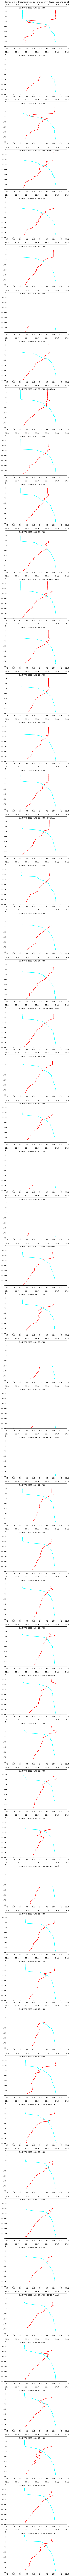

In [19]:
# temperature and salinity
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['salinity']], profile_list, 
                          d['temperature'][0], d['temperature'][1], 'Temperature', colors['temperature'],    'ascent',
                          d['salinity'][0],       d['salinity'][1],    'Salinity',  colors['salinity'], 'ascent', 6, 4)

In [ ]:
# density and pressure
fig,axs = ChartTwoSensors(profiles, [ranges['density'], ranges['pressure']], profile_list, 
                          d['density'][0], d['density'][1], 'Density', colors['density'],    'ascent',
                          d['pressure'][0],       d['pressure'][1],    'Pressure',  colors['pressure'], 'ascent', 6, 4)

In [ ]:
# dissolved oxygen and chlorophyll-a
fig,axs = ChartTwoSensors(profiles, [ranges['do'], ranges['chlora']], profile_list, 
                          d['do'][0], d['do'][1], 'Dissolved Oxygen', colors['do'],    'ascent',
                          d['chlora'][0],       d['chlora'][1],    'Chlorophyll-A',  colors['chlora'], 'ascent', 6, 4)

In [ ]:
# fdom and backscatter

fig,axs = ChartTwoSensors(profiles, [ranges['fdom'], ranges['bb']], profile_list, 
                          d['fdom'][0], d['fdom'][1], 'FDOM', colors['do'], 'ascent',
                          d['bb'][0], d['bb'][1], 'Backscatter', colors['chlora'], 'ascent', 6, 4)

In [ ]:
# pH and pCO2
# Notice that pH and pCO2 are measured only on midnight and noon *descents*
#   Profile 3 is the first midnight profile, 8 the first noon (but labels need fixing)
fig,axs = ChartTwoSensors(profiles, [ranges['ph'], ranges['pco2']], [3, 8, 12],
                          d['ph'][0], d['ph'][1], 'pH', colors['ph'], 'descent',
                          d['pco2'][0], d['pco2'][1], 'pCO2', colors['pco2'], 'descent', 6, 4)

In [ ]:
# Two good representatives of noon spectral irradiance
fig,axs = ChartTwoSensors(profiles, [ranges['spkir'], ranges['spkir']], [8, 80],
                          d['412nm'][0], d['412nm'][1], '412nm', colors['spkir'], 'ascent',
                          d['555nm'][0], d['555nm'][1], '555nm', colors['spkir'], 'ascent', 6, 4)


In [ ]:
# PAR and longer-wavelength spectral irradiance (not a very strong signal; see above)
fig,axs = ChartTwoSensors(profiles, [ranges['par'], ranges['spkir']], [8, 80],
                          d['par'][0], d['par'][1], 'PAR', colors['par'], 'ascent',
                          d['620nm'][0], d['620nm'][1], '620nm spkir', colors['spkir'], 'ascent', 6, 4)

In [ ]:
# Nitrate and current velocity 'up' (midnight and noon: ascent for nitrate)
fig,axs = ChartTwoSensors(profiles, [ranges['nitrate'], ranges['up']], [3, 8, 12],
                          d['nitrate'][0], d['nitrate'][1], 'nitrate', colors['nitrate'], 'ascent',
                          d['up'][0], d['up'][1], 'Upward velocity', colors['up'], 'ascent', 6, 4)

In [ ]:
how_many_current_charts = 50
first_current_chart = 200
profile_list = [n for n in range(first_current_chart, first_current_chart + how_many_current_charts)]
# Current velocity 'east' and 'north'
fig,axs = ChartTwoSensors(profiles, [ranges['east'], ranges['north']], profile_list,
                          d['east'][0], d['east'][1], 'east velocity', colors['east'], 'ascent',
                          d['north'][0], d['north'][1], 'north velocity', colors['north'], 'ascent', 6, 4)

## Summary so far


The material above demonstrates charting most of the available sensors. In some cases this involves
careful selection of relevant profiles and profile phases (ascent versus descent). This notebook next
presents ensemble views of data via *bundle charts*. It then concludes with a few "what next?" ideas.

## Bundle charts


A bundle chart simply overlays sensor profiles. Ideally we have a working time range and the ability
to select subsets into a bundle view.

In [20]:
def GenerateTimeWindowIndices(p, date0, date1, time0, time1):
    '''
    In UTC: Define a time box from two bounding days and -- within a day -- 
    a bounding time interval. This function then produces a list of profile 
    indices for profiles that begin ascent within the time box. 
    p           profile Dataframe
    date0       define the time box in the [date0, date1] sense
    date1
    time0       likewise inclusive [time0, time1] sense
    time1
    '''
    print(type(p), type(date0), type(time0))
    pidcs = []
    for i in range(len(p)):
        a0 = p["a0t"][i]
        if a0 >= date0 and a0 <= date1 + td64(1, 'D'):
            delta_t = a0 - dt64(a0.date())
            if delta_t >= time0 and delta_t <= time1: pidcs.append(i)
    return pidcs

In [21]:
def BundleChart(p, date0, date1, time0, time1, wid, hgt, data, title):
    '''
    Create a bundle chart: Multiple profiles showing sensor/depth in ensemble.
        p       profile table
        date0   start / end of time range: date only, range is inclusive [date0, date1]
        date1
        time0   start / end time range for each day
        time1       (this scheme permits selecting midnight or noon)
        wid     figure size
        hgt
        data    a value from the data dictionary (5-tuple: includes range and color)
        title   chart title
    '''
    pidcs = GenerateTimeWindowIndices(p, date0, date1, time0, time1) # each index contributes a thread to the bundle
    fig, ax = plt.subplots(figsize=(wid, hgt), tight_layout=True)
    for i in range(len(pidcs)):
        ta0, ta1 = p["a0t"][pidcs[i]], p["a1t"][pidcs[i]]          # [ta0, ta1] is this thread's time range (ascent)
        ax.plot(data[0].sel(time=slice(ta0,  ta1)), data[1].sel(time=slice(ta0, ta1)), ms = 4., color=data[4], mfc=data[4])
    ax.set(title = title)
    ax.set(xlim = (data[2], data[3]), ylim = (-200, 0))
    return ax

<class 'pandas.core.frame.DataFrame'> <class 'numpy.datetime64'> <class 'numpy.timedelta64'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.datetime64'> <class 'numpy.timedelta64'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.datetime64'> <class 'numpy.timedelta64'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.datetime64'> <class 'numpy.timedelta64'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.datetime64'> <class 'numpy.timedelta64'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.datetime64'> <class 'numpy.timedelta64'>
<class 'pandas.core.frame.DataFrame'> <class 'numpy.datetime64'> <class 'numpy.timedelta64'>


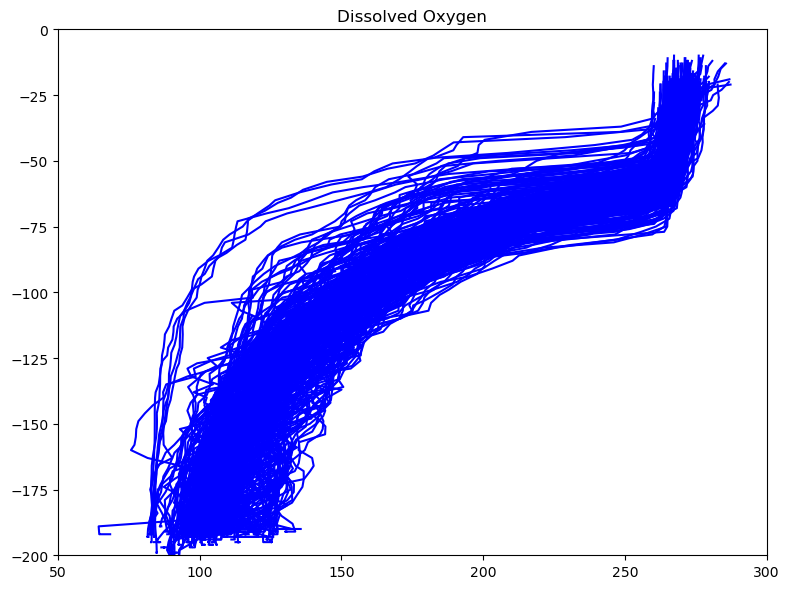

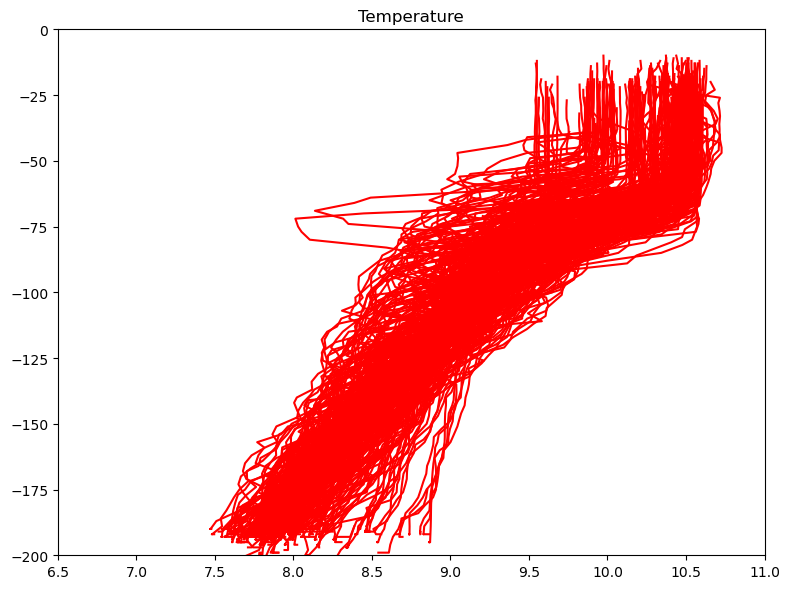

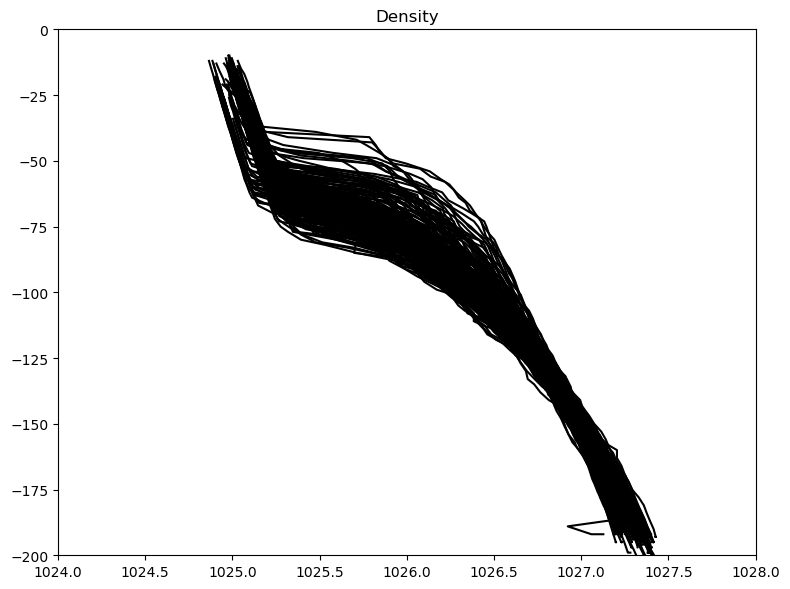

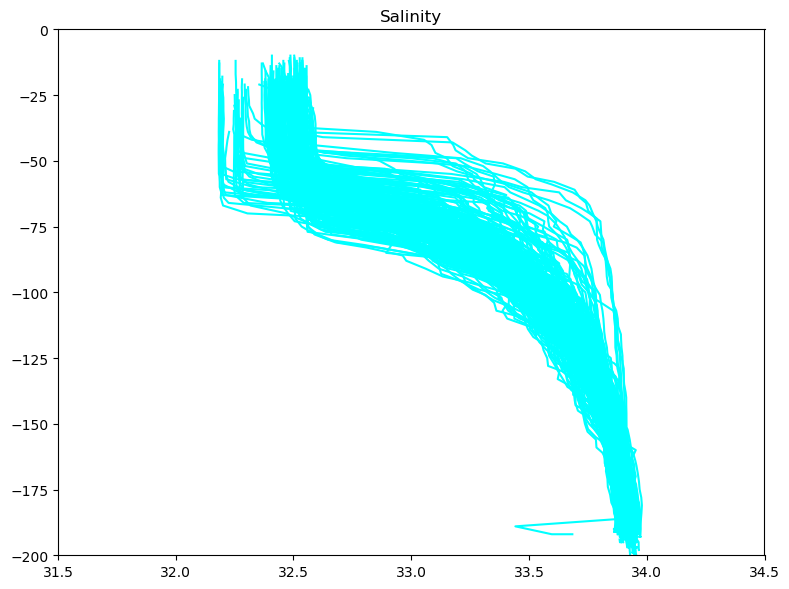

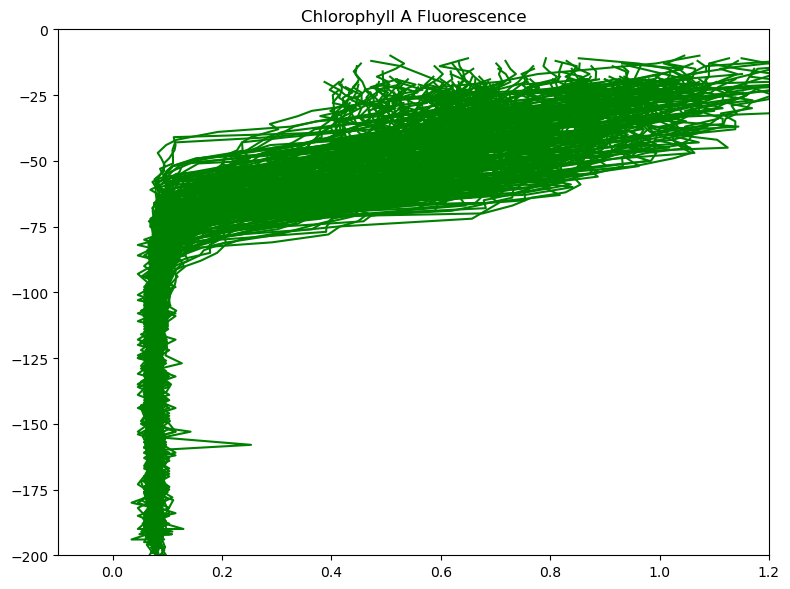

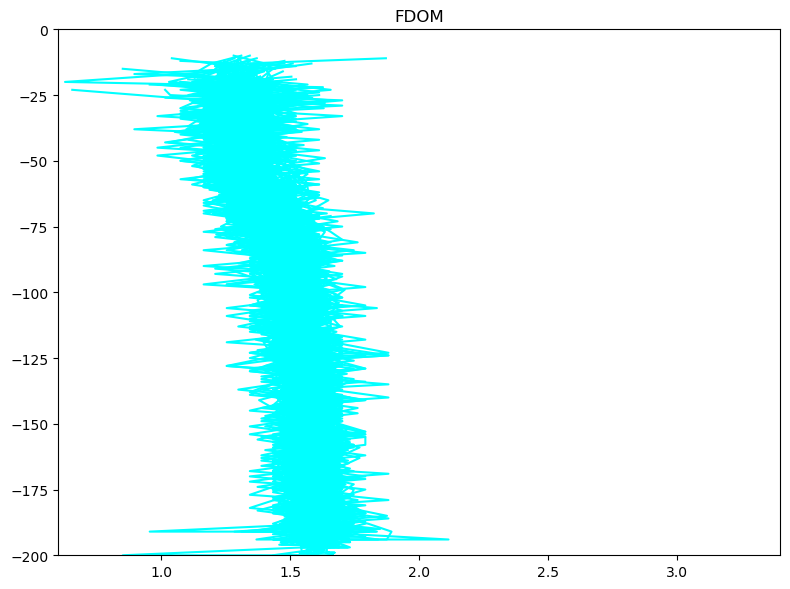

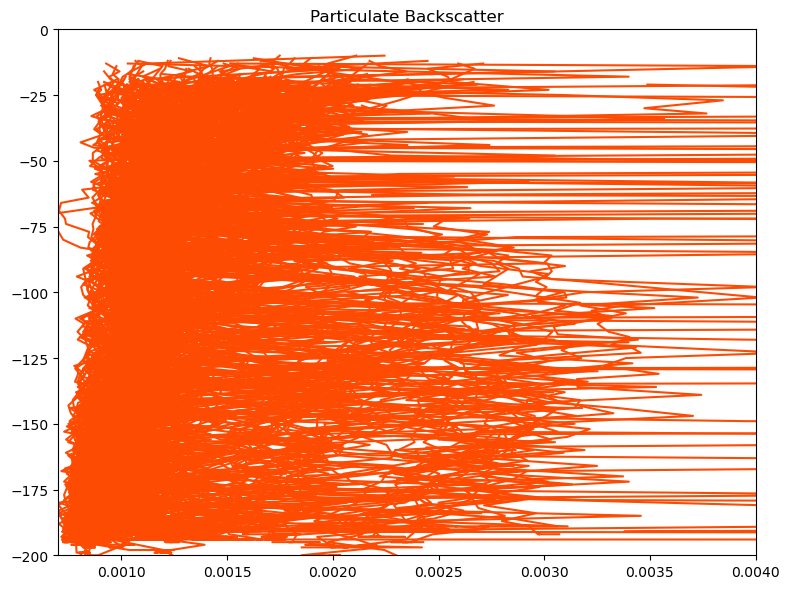

In [22]:
def ShowStaticBundles():
    '''creates bundle charts for Jan 2022, Oregon Slope Base'''
    BundleChart(profiles, dt64('2022-01-01'), dt64('2022-02-01'), td64(0, 'h'), td64(24, 'h'), 8, 6, d['do'], 'Dissolved Oxygen')
    BundleChart(profiles, dt64('2022-01-01'), dt64('2022-02-01'), td64(0, 'h'), td64(24, 'h'), 8, 6, d['temperature'], 'Temperature')
    BundleChart(profiles, dt64('2022-01-01'), dt64('2022-02-01'), td64(0, 'h'), td64(24, 'h'), 8, 6, d['density'], 'Density')
    BundleChart(profiles, dt64('2022-01-01'), dt64('2022-02-01'), td64(0, 'h'), td64(24, 'h'), 8, 6, d['salinity'], 'Salinity')
    BundleChart(profiles, dt64('2022-01-01'), dt64('2022-02-01'), td64(0, 'h'), td64(24, 'h'), 8, 6, d['chlora'], 'Chlorophyll A Fluorescence')
    BundleChart(profiles, dt64('2022-01-01'), dt64('2022-02-01'), td64(0, 'h'), td64(24, 'h'), 8, 6, d['fdom'], 'FDOM')
    BundleChart(profiles, dt64('2022-01-01'), dt64('2022-02-01'), td64(0, 'h'), td64(24, 'h'), 8, 6, d['bb'], 'Particulate Backscatter')
    
    return

ShowStaticBundles()

In [23]:
from ipywidgets import interact, widgets
from traitlets import dlink

In [33]:
def BundleInteract(sensor_key, time_index, bundle_size):
    '''
    Consider a time range that includes many (e.g. 279) consecutive profiles. This function plots sensor data
    within the time range. Choose the sensor using a dropdown. Choose the first profile using the start slider.
    Choose the number of consecutive profiles to chart using the bundle slider. 
    '''
        
    dsXv = d[sensor_key][0]
    dsXz = d[sensor_key][1]
    xlo = d[sensor_key][2]
    xhi = d[sensor_key][3]
    xtitle = sensor_names[sensor_key]
    xcolor = d[sensor_key][4]

    # This configuration code block is hardcoded to work with March 2021
    date0, date1   = dt64('2022-01-01'), dt64('2022-02-01')
    time0, time1   = td64(0, 'h'), td64(24, 'h')
    wid, hgt       = 9, 6
    x0, x1, y0, y1 = xlo, xhi, -200, 0
    title          = xtitle
    color          = xcolor
    pidcs          = GenerateTimeWindowIndices(profiles, date0, date1, time0, time1)               # !!!!!!!!!!!!!!!!!!!!!! flag
    nProfiles      = len(pidcs)

    # ad hoc locations on respective charts for text giving time range of current bundle
    # pxpy           = { labelO: (60, -25), labelT: (6.8, -25), labelS: (33.5, -25),    \
    #                    labelA: (0.7, -150), labelB: (.0017, -70), labelC: (.65, -175),    \
    #                    labelN: (23, -25), labelP: (150, -75), labelH: (7.65, -25),    \
    #                    labelR: (900, -25) }
    # px, py         = pxpy[choice]
    
    fig, ax = plt.subplots(figsize=(wid, hgt), tight_layout=True)
    iProf0 = time_index if time_index < nProfiles else nProfiles
    iProf1 = iProf0 + bundle_size if iProf0 + bundle_size < nProfiles else nProfiles
    for i in range(iProf0, iProf1):
        pIdx = pidcs[i]
        # if choice == labelH or choice == labelR:
        #     ta0, ta1 = p["descent_start"][pIdx], p["descent_end"][pIdx]
        ta0, ta1 = profiles["a0t"][pIdx], profiles["a1t"][pIdx]
        dsXsensor, dsXdepth = dsXv.sel(time=slice(ta0,  ta1)), dsXz.sel(time=slice(ta0, ta1))
        ax.plot(dsXsensor, dsXdepth, ms = 4., color=color, mfc=color)
    ax.set(title = title)
    ax.set(xlim = (x0, x1), ylim = (y0, y1))

    # Add text indicating the current time range of the profile bundle
    # tString = str(p["ascent_start"][pIdcs[iProf0]])
    # if iProf1 - iProf0 > 1: tString += '\n ...through... \n' + str(p["ascent_start"][pIdcs[iProf1-1]])
    # ax.text(px, py, tString)
    
    plt.show()
    return

In [34]:
def Interactor(continuous_update = False):
    '''Set up three bundle-interactive charts, vertically. Independent sliders for choice of 
    sensor, starting profile by index, and number of profiles in bundle. (90 profiles is about
    ten days.) A fast machine can have cu = True to give a slider-responsive animation. Make
    it False to avoid jerky 'takes forever' animation on less powerful machines.
    '''
    style = {'description_width': 'initial'}
    
    # data dictionary d{} keys:
    optionsList = ['temperature', 'salinity', 'density', 'do', 'chlora', 'fdom', 'bb', 'pco2', 'ph', 'par', 'nitrate']

    interact(BundleInteract, \
                             sensor_key = widgets.Dropdown(options=optionsList,  value=optionsList[0], description='sensor'), \
                             time_index = widgets.IntSlider(min=0, max=270, step=1, value=188,                    \
                                                            layout=widgets.Layout(width='35%'),                   \
                                                            continuous_update=False, description='bundle start',  \
                                                            style=style),
                             bundle_size = widgets.IntSlider(min=1, max=90, step=1, value=18,                     \
                                                            layout=widgets.Layout(width='35%'),                   \
                                                            continuous_update=False, description='bundle width',  \
                                                            style=style))

    return

Interactor(False)

interactive(children=(Dropdown(description='sensor', options=('temperature', 'salinity', 'density', 'do', 'chl…

  



## Concept material


The following material indicates thoughts from earlier development.

### Extending dual charts (above) to multiple duals

<BR>
<img src="./../images/charts/ABCOST_signals_vs_depth_and_time.png" style="float: left;" alt="drawing" width="400"/>
<div style="clear: left"><BR>
    

In [ ]:
from IPython.display import HTML, Video
Video('../images/animations/multisensor_animation.mp4', embed=True, width = 500, height = 500)

### MODIS surface chlorophyll

<BR>
<img src="./../images/modis/chlorophyll.png" style="float: left;" alt="drawing" width="400"/>
<div style="clear: left"><BR>

### Filtering concept based on xrscipy


`xr-scipy` is a thin wrapper of scipy for xarray eco-system. It includes
digital filter machinery.


- [main site](https://xr-scipy.readthedocs.io/en/latest/index.html)
- [geo applications site](https://scrapbox.io/pycoaj/xr-scipy)


```
import xrscipy.other.signal as dsp
t = np.linspace(0, 1, 1000)  # seconds
sig = xr.DataArray(np.sin(16*t) + np.random.normal(0, 0.1, t.size),
                   coords=[('time', t)], name='signal')
sig.plot(label='noisy')
low = dsp.lowpass(sig, 20, order=8)  # cutoff at 20 Hz
low.plot(label='lowpass', linewidth=5)
plt.legend()
plt.show()
```